In [63]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
x = [12.4,14.3,14.5,14.9,16.1,16.9,16.5,15.4,17.0,17.9,18.8,20.3,22.4,19.4,15.5,16.7,17.3,18.4,19.2,17.4,19.5,19.7,21.2]
y = [11.2,
 12.5,
 12.7,
 13.1,
 14.1,
 14.8,
 14.4,
 13.4,
 14.9,
 15.6,
 16.4,
 17.7,
 19.6,
 16.9,
 14.0,
 14.6,
 15.1,
 16.1,
 16.8,
 15.2,
 17.0,
 17.2,
 18.6]

In [80]:
xTensor = torch.tensor(x)
yTensor = torch.tensor(y)

In [81]:
xTensor.shape

torch.Size([23])

In [226]:
def gradientDescent(x,y, a = 0.01, epochs = 100, initialw = torch.rand([1]), initialb=torch.rand([1]), losspow = 2):
    w = initialw.requires_grad_(True)
    b = initialb.requires_grad_(True)
    lr = torch.tensor(a)
    losses = []
    weights = []
    biases = []
    for epoch in range(epochs):
        loss = 0.0
        for i in range(len(x)):
            a = w * x[i]
            yp = a+b

            loss += (yp - y[i])**losspow
        loss/=len(x)
        losses.append(loss.item())
        loss.backward()
        with torch.no_grad():
            w-=lr*w.grad
            b-=lr*b.grad
            weights.append(w.item())
            biases.append(b.item())
        w.grad.zero_()
        b.grad.zero_()
    return w,b,losses, weights, biases

In [227]:
w,b,losses,_,_ = gradientDescent(xTensor, yTensor, a = 0.001, epochs = 30)

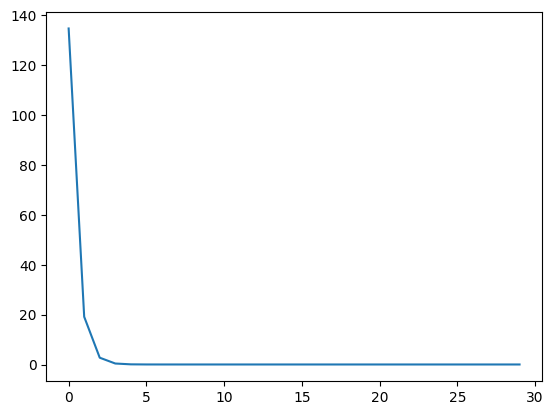

In [228]:
plt.plot(losses)
plt.show()

In [229]:
x2 = torch.tensor([2.0,4.0])
y2 = torch.tensor([20.0,40.0])

In [230]:
_,_,lo,weights, biases = gradientDescent(x2, y2, a = 0.001, epochs = 2, initialw = torch.tensor([1.0]), initialb = torch.tensor([1.0]), losspow = 1)

In [233]:
weights

[0.996999979019165, 0.9939999580383301]

In [232]:
biases

[0.9990000128746033, 0.9980000257492065]

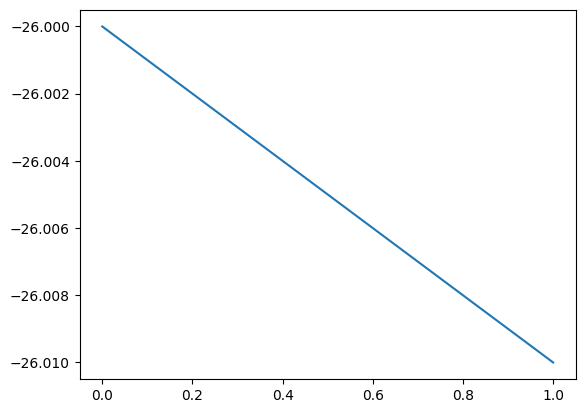

In [215]:
plt.plot(lo)